In [1]:
import pandas as pd

# 一、查看数据

## 1.1 导入数据

In [2]:
train_df = pd.read_csv("./train.csv")
test_df  = pd.read_csv("./test.csv")

In [3]:
train_df.shape,test_df.shape

((1460, 81), (1459, 80))

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.2 删除重复值

In [5]:
# Count number of distinct elements in specified axis.
train_df.nunique().sort_values()

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

In [6]:
train_df.drop_duplicates(keep='first',inplace=True)

In [7]:
train_df.shape

(1460, 81)

## 1.3 查看缺失值
- 按列统计空值
- 排序
- 筛选 <b>缺失值>0</b> 的特征

In [8]:
s = train_df.isna().sum().sort_values(ascending=False)
s[s>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

# 二、处理数据

## 2.1 简单交叉验证

In [10]:
X = train_df.drop(labels=['SalePrice'], axis=1)
y = train_df['SalePrice']

In [11]:
X.shape,y.shape

((1460, 80), (1460,))

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 100)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 80)
(438, 80)
(1022,)
(438,)


## 2.2 处理目标值'SalePrice'

In [14]:
train_df['SalePrice'].max()

755000

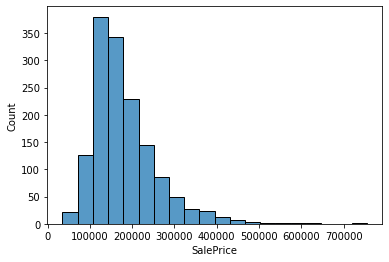

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=train_df['SalePrice'], bins=20)
plt.show()

In [16]:
y_train.values

array([ 98000, 260000, 113000, ..., 318061, 110000, 269790], dtype=int64)

In [17]:
# Return a Series containing counts of unique rows in the DataFrame.
# normalize : bool, default False
# Return proportions(比例) rather than frequencies.
y_train.value_counts(normalize=True)*100
y_test.value_counts(normalize=True)*100

140000    1.369863
125000    1.141553
139000    1.141553
145000    1.141553
160000    1.141553
            ...   
395000    0.228311
446261    0.228311
174900    0.228311
246578    0.228311
104000    0.228311
Name: SalePrice, Length: 297, dtype: float64

- 买房价格‘SalePrice’最多的是135000元

## 2.3 object类型转化成category类型

In [18]:
cols = train_df.select_dtypes(include='object').columns
cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
for col in cols:
    train_df[col] = train_df[col].astype('category')

In [20]:
train_df.dtypes.value_counts()

int64       35
category     5
float64      3
category     3
category     2
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

## 2.4、 划分类别型和数值型数据

In [21]:
cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1',
            'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
            'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive',
            'SaleType', 'SaleCondition']
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [22]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

## 2.5 填充缺失值

### 2.5.1 填充类别型数据的缺失值

In [23]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_cat_train)
df_cat_imp_train = pd.DataFrame(cat_imputer.transform(df_cat_train),columns=cat_cols)
df_cat_imp_test = pd.DataFrame(cat_imputer.transform(df_cat_test),columns=cat_cols)

In [24]:
df_cat_imp_train.shape,df_cat_imp_test.shape

((1022, 27), (438, 27))

In [25]:
df_cat_imp_train.isna().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Condition1       0
BldgType         0
RoofStyle        0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
HeatingQC        0
CentralAir       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

### 2.5.2 填充数值型数据的缺失值

In [26]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
num_imputer.fit(df_num_train)

df_num_imp_train = pd.DataFrame(num_imputer.transform(df_num_train), columns=num_cols)
df_num_imp_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_cols)

In [27]:
df_num_imp_train.shape,df_num_imp_test.shape

((1022, 35), (438, 35))

In [28]:
df_num_imp_train.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

### 2.5.3 拼接数据

In [29]:
X_train = pd.concat([df_cat_imp_train, df_num_imp_train], axis = 1)
X_test = pd.concat([df_cat_imp_test, df_num_imp_test], axis = 1)

In [30]:
print(df_cat_imp_train.shape)
print(df_num_imp_train.shape)
print(X_train.shape)
print(X_test.shape)

(1022, 27)
(1022, 35)
(1022, 62)
(438, 62)


## 2.6 编码

In [31]:
df_cat_imp_train.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,RoofStyle,MasVnrType,...,HeatingQC,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,Norm,1Fam,Gable,None,...,TA,N,TA,Typ,Attchd,Unf,TA,Y,WD,Normal
1,RL,Pave,Reg,Low,Inside,Mod,Norm,1Fam,Gable,BrkFace,...,Ex,Y,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,Inside,Gtl,Norm,1Fam,Gable,None,...,TA,Y,TA,Typ,Detchd,Unf,TA,Y,WD,Normal
3,RM,Pave,Reg,Lvl,Corner,Gtl,Feedr,1Fam,Hip,None,...,Gd,Y,Gd,Typ,Attchd,Unf,TA,Y,WD,Normal
4,RM,Pave,Reg,Lvl,Inside,Gtl,Norm,2fmCon,Gable,None,...,Gd,Y,TA,Typ,Detchd,Unf,TA,N,WD,Normal


### 2.6.1 类别型数据进行onehot编码

In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_cat_imp_train)
df_cat_imp_ohe_train = ohe.transform(df_cat_imp_train).toarray()
df_cat_imp_ohe_test = ohe.transform(df_cat_imp_test).toarray()

In [33]:
df_cat_imp_ohe_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [34]:
df_cat_imp_ohe_train.shape,df_cat_imp_ohe_test.shape

((1022, 131), (438, 131))

In [35]:
# 'MSZoning'有5个unique值，one-hot编码后变成5列
# 举例：
# df = pd.DataFrame({'A':[1,2,2],'B':[3,2,1]})
# df
# ohe.fit_transform(df).toarray()
df_cat_imp_train.nunique().sum()

131

### 2.6.2 数值型数据进行scalar归一化

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num_imp_train)
df_num_imp_ss_train = scaler.transform(df_num_imp_train)
df_num_imp_ss_test = scaler.transform(df_num_imp_test)

In [37]:
df_num_imp_ss_train

array([[-0.65742734, -0.10841021, -0.47394256, ..., -0.08422185,
        -0.83248792,  0.13529404],
       [ 0.03595836,  0.93340922, -0.05681892, ..., -0.08422185,
        -0.83248792,  0.88270223],
       [-0.19517021, -0.78785766, -0.16935297, ..., -0.08422185,
        -0.83248792,  1.63011041],
       ...,
       [ 1.42272975, -0.06311371, -0.25877822, ..., -0.08422185,
         2.07997303, -0.61211414],
       [-0.19517021, -0.42548568, -0.00438717, ..., -0.08422185,
        -0.4684303 ,  0.88270223],
       [ 0.03595836,  1.02400221, -0.054877  , ..., -0.08422185,
        -0.10437268, -0.61211414]])

In [38]:
df_num_imp_ss_train.shape,df_num_imp_ss_test.shape

((1022, 35), (438, 35))

### 2.6.3 拼接数据

In [39]:
import numpy as np
X_train_con = np.concatenate([df_cat_imp_ohe_train, df_num_imp_ss_train], axis=1)
X_test_con = np.concatenate([df_cat_imp_ohe_test, df_num_imp_ss_test], axis=1)

In [40]:
print(df_cat_imp_ohe_train.shape)
print(df_num_imp_ss_train.shape)
print(X_train_con.shape)
print(X_test_con.shape)

(1022, 131)
(1022, 35)
(1022, 166)
(438, 166)


In [41]:
X_train_con.shape,y_train.shape

((1022, 166), (1022,))

# 三、 模型

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_con,y_train)

LinearRegression()

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_con,y_train)

RandomForestRegressor()

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train_con,y_train)

KNeighborsRegressor()

In [45]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train_con,y_train)

SVR(kernel='linear')

In [46]:
lr_train_preds = lr.predict(X_train_con)
lr_test_preds = lr.predict(X_test_con)
lr_train_preds_score = lr.score(X_train_con,y_train)
lr_test_preds_score = lr.score(X_test_con,y_test)
print(lr_train_preds_score)
print(lr_test_preds_score)

0.8688273072947108
-3.975232246252815e+16


In [47]:
rfr_train_preds = rfr.predict(X_train_con)
rfr_test_preds = rfr.predict(X_test_con)
rfr_train_preds_score = rfr.score(X_train_con,y_train)
rfr_test_preds_score = rfr.score(X_test_con,y_test)
print(rfr_train_preds_score)
print(rfr_test_preds_score)

0.9777322960653269
0.8452064581749835


In [48]:
knr_train_preds = knr.predict(X_train_con)
knr_test_preds = knr.predict(X_test_con)
knr_train_preds_score = knr.score(X_train_con,y_train)
knr_test_preds_score = knr.score(X_test_con,y_test)
print(knr_train_preds_score)
print(knr_test_preds_score)

0.8212628545595972
0.7765767279222439


In [49]:
svr_train_preds = svr.predict(X_train_con)
svr_test_preds = svr.predict(X_test_con)
svr_train_preds_score = svr.score(X_train_con,y_train)
svr_test_preds_score = svr.score(X_test_con,y_test)
print(svr_train_preds_score)
print(svr_test_preds_score)

0.07825748085474715
0.0686429280228581


# 处理测试集

In [50]:
cat_cols = test_df.select_dtypes(include='object').columns
for col in cat_cols:
    test_df[col] = test_df[col].astype('category')

In [51]:
cat_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1',
            'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
            'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive',
            'SaleType', 'SaleCondition']
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [52]:
df_cat = test_df[cat_cols]
df_num = test_df[num_cols]
print(df_cat.shape)
print(df_num.shape)

(1459, 27)
(1459, 35)


In [53]:
# 补充缺失值
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer.fit(df_cat)

df_cat_imp = pd.DataFrame(cat_imputer.transform(df_cat), columns=cat_cols)

In [54]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
num_imputer.fit(df_num)

df_num_imp = pd.DataFrame(num_imputer.transform(df_num), columns=num_cols)

In [55]:
df_test_simp = pd.concat([df_cat_imp, df_num_imp], axis = 1)

In [56]:
# 编码
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df_cat_imp)
df_cat_imp_ohe = ohe.transform(df_cat_imp).toarray()

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_num_imp)
df_num_imp_ss = scaler.transform(df_num_imp)

In [58]:
df_test_con = np.concatenate([df_cat_imp_ohe, df_num_imp_ss], axis=1)

In [59]:
df_test_con.shape

(1459, 166)

In [60]:
# 预测
lr_test_preds1 = lr.predict(df_test_con)
lr_test_preds1

array([ 3.51434956e+14,  2.39272773e+13, -4.66125625e+12, ...,
        1.03345998e+14,  2.95463667e+14, -1.99551395e+14])

In [61]:
rfr_test_preds1 = rfr.predict(df_test_con)
rfr_test_preds1

array([127326.33, 157135.45, 181119.3 , ..., 161004.34, 122959.35,
       242086.62])

In [62]:
knr_test_preds1 = knr.predict(df_test_con)
knr_test_preds1

array([124680., 166680., 181500., ..., 153780., 134920., 220500.])

In [63]:
svr_test_preds1 = svr.predict(df_test_con)
svr_test_preds1

array([156142.64516049, 159475.08734219, 164995.12549221, ...,
       162007.25167084, 157324.02838384, 168743.00429973])

In [64]:
rfr_sample_submission = pd.DataFrame({"Id":test_df["Id"], "SalePrice":rfr_test_preds1})
rfr_sample_submission

,Id,SalePrice
0,1461,127326.33
1,1462,157135.45
2,1463,181119.30
3,1464,177110.00
4,1465,199400.46
...,...,...
1454,2915,90829.00
1455,2916,92605.00
1456,2917,161004.34
1457,2918,122959.35


In [65]:
rfr_sample_submission.to_csv("sample_submission.csv",index=False)